In [106]:
#https://machinelearningmastery.com/time-series-data-visualization-with-python/
#https://nbviewer.jupyter.org/url/pbpython.com/extras/Combining-Multiple-Excel-File-with-Pandas.ipynb
#https://pbpython.com/excel-file-combine.html
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#https://stackoverflow.com/questions/49032646/ls-is-not-recognized-as-an-internal-or-external-command-operable-program-or-b/49032775
!dir

 Volume in drive C has no label.
 Volume Serial Number is EE71-94F8

 Directory of C:\Users\swang\Python\Project\Boxplot

04/17/2019  01:58 PM    <DIR>          .
04/17/2019  01:58 PM    <DIR>          ..
04/17/2019  11:09 AM    <DIR>          .ipynb_checkpoints
04/17/2019  01:53 PM             5,134 boxplot.ipynb
04/17/2019  12:47 PM            55,889 daily-minimum-temperatures.csv
12/19/2017  04:54 PM         1,027,240 MMI-Dec 2017 - Data File.xlsx
03/25/2019  12:44 PM         1,098,300 MMI-December 2018 Datafile.xlsx
06/26/2018  03:04 PM         1,106,739 MMI-Jun 2018 - Data File.xlsx
04/17/2019  01:56 PM         1,109,469 MMI-June 2017 - Data File.xlsx
03/26/2018  04:15 PM         1,035,302 MMI-Mar 2018 - Data File.xlsx
04/17/2019  01:57 PM         1,190,569 MMI-March 2017 - Data File.xlsx
03/25/2019  11:36 AM         1,185,637 MMI-March 2019 Datafile.xlsx
09/27/2017  02:33 PM         1,115,753 MMI-Sept 2017 - Data File.xlsx
09/13/2018  01:51 PM         1,155,454 MMI-Sept 2018 - Da

In [32]:
import glob
listFiles=glob.glob("*.xlsx")
listFiles.sort()
listFiles

['MMI-Dec 2017_4.xlsx',
 'MMI-December 2018_8.xlsx',
 'MMI-Jun 2018_6.xlsx',
 'MMI-June 2017_2.xlsx',
 'MMI-Mar 2018_5.xlsx',
 'MMI-March 2017_1.xlsx',
 'MMI-March 2019_9.xlsx',
 'MMI-Sept 2017_3.xlsx',
 'MMI-Sept 2018_7.xlsx']

In [52]:
# create a dataframe
all_data=pd.DataFrame()
# append each excel file to the "all_data"
for file in listFiles:
    df=pd.read_excel(file)
    all_data=all_data.append(df,ignore_index=True)  
all_data.to_excel('merged.xlsx',sheet_name='past 9 waves')

In [53]:
# Check shape
all_data.shape

(9007, 910)

In [155]:
#all_data.columns

In [153]:
# Rename to q1-revenue growth no outliers
all=all_data.rename(columns={"Q.1 - % Change in Company's Current Gross Revenues Compared to 1 Year Ago - Use for Calculation of Mean":"q1-revenue growth no outliers in %"})

In [154]:
# label wave
def wave(wave):
    if wave==21:
        return '2017 Q1'
    elif wave==22:
        return '2017 Q2'
    elif wave==23:
        return '2017 Q3'
    elif wave==24:
        return '2017 Q4'
    elif wave==25:
        return '2018 Q1'
    elif wave==26:
        return '2018 Q2'
    elif wave==27:
        return '2018 Q3'
    elif wave==28:
        return '2018 Q4'
    elif wave==29:
        return '2019 Q1'
all['wavelabel']=all['Wave'].apply(wave)
#all.sort_values(by=['wavelabel'])

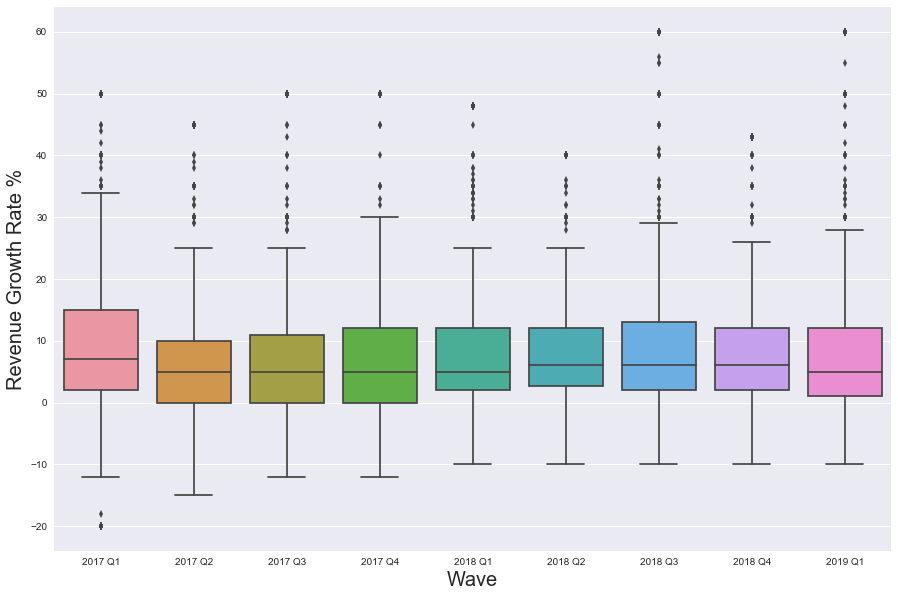

In [151]:
# Below is to include all the data point
#ax=sns.swarmplot(x="Wave",y="q1-revenue growth no outliers in %",data=all,color=".25")
# Boxplot not showing outliers
sns.set(rc={'figure.figsize':(15,10)})
waveOrder=["2017 Q1","2017 Q2","2017 Q3","2017 Q4","2018 Q1","2018 Q2","2018 Q3","2018 Q4", "2019 Q1"]
# False if dont want to show outliers
myboxplot=sns.boxplot(x="wavelabel",y="q1-revenue growth no outliers in %",data=all,showfliers=True, order=waveOrder) 
myboxplot.set_xlabel("Wave",fontsize=20)
myboxplot.set_ylabel("Revenue Growth Rate %",fontsize=20)
myboxplot.tick_params(labelsize=10)

# Below is an example of dataframe append method

In [46]:
# create a df 1
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df1

,A,B
0,1,2
1,3,4


In [50]:
# create a df 2
df2 = pd.DataFrame([[5, 6, 99], [7, 8, 1010]], columns=list('ACD'))
df2

,A,C,D
0,5,6,99
1,7,8,1010


In [51]:
# append df2 to df1 (stack them up, new column will become new columns)
df1.append(df2, ignore_index=True)

,A,B,C,D
0,1,2.0,NaN,NaN
1,3,4.0,NaN,NaN
2,5,NaN,6.0,99.0
3,7,NaN,8.0,1010.0
